<font size="+3"><strong>Exploring the Data</strong></font>

In this project, we're going to work with data from the [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and we'll work with an extract of the results from 2022.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Prepare Data

## Import

In [2]:
# Read the file `"data/SCFP2022.csv"` into the DataFrame `df`
df = pd.read_csv("data/SCFP2022.csv")
print("df shape:", df.shape)
df.head()

df shape: (22975, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 351 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the [data dictionary](./04_data_dictionary.ipynb). 

For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the `"TURNFEAR"` column. 

In [3]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]

print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (3839, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


## Explore

### Age

Now that we have our subset, let's explore the characteristics of this group. One of the features is age group (`"AGECL"`).

we will create a list `age_groups` with the unique values in the `"AGECL"` column. Then we will review the entry for `"AGECL"` in the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbkfx0.htm) to determine what the values represent.

In [4]:
age_groups = df_fear["AGECL"].unique()

print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


Looking at the Code Book we can see that `"AGECL"` represents categorical data, even though the values in the column are numeric.

![](./images/agecl.png)

This simplifies data storage, but it's not very human-readable. So before we create a visualization, let's create a version of this column that uses the actual group names.

In [5]:
# Create a Series `agecl` that contains the observations from `"AGECL"` using the true group names

agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head(10)

20     Under 35
21     Under 35
22     Under 35
23     Under 35
24     Under 35
110       55-64
111       55-64
112       55-64
113       55-64
114       55-64
Name: AGECL, dtype: object

Now that we have better labels, let's make a bar chart and see the age distribution of our group.

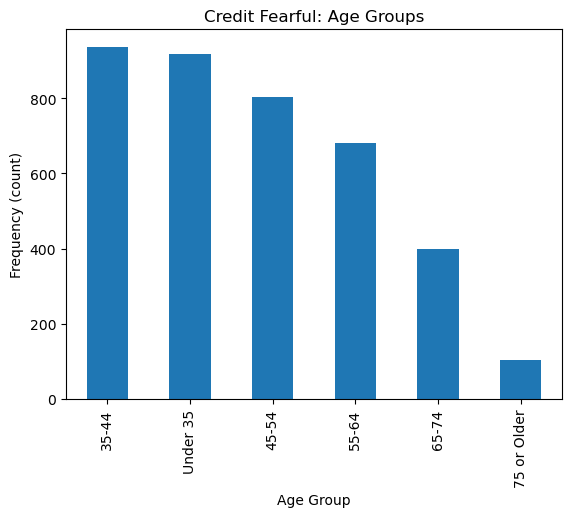

In [6]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful: Age Groups"
);

We might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: `"AGE"`. Whereas `"AGECL"` was a categorical variable, `"AGE"` is continuous, so we can use it to make a histogram of our own.

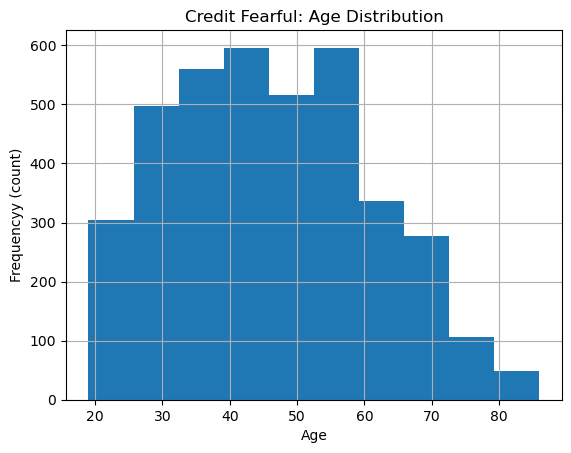

In [7]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequencyy (count)")
plt.title("Credit Fearful: Age Distribution");

### Race

Now that we have an understanding of how age relates to our outcome of interest, let's try some other possibilities, starting with race. If we look at the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2022/DOC/hcbk0001.htm#RACE) for `"RACE"`, we can see that there are 4 categories.

![](./images/race.png)

Note that there's no `4` category here. If a value for 4 *did* exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset.

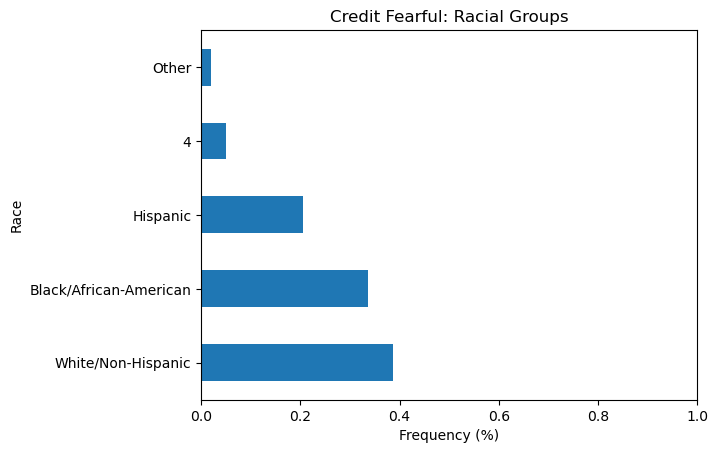

In [8]:
# Create a horizontal bar chart showing the normalized value counts for "RACE"

race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

This suggests that White/Non-Hispanic and Black/African-American people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic and Black/African-American in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

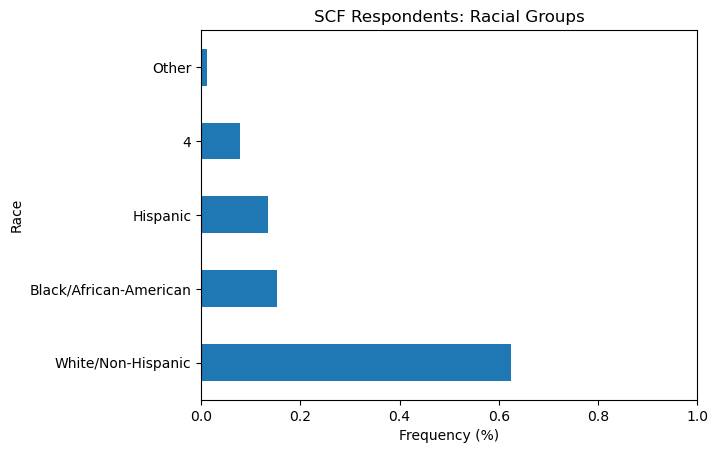

In [9]:
# Recreate the horizontal bar chart you just made, but this time use the entire dataset df instead of the subset df_fear

race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

### Income

What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the `"INCCAT"` feature, which captures income percentile groups. This time, though, we'll make a single, side-by-side bar chart.

![](./images/inccat.png)

We will create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset.

In [11]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


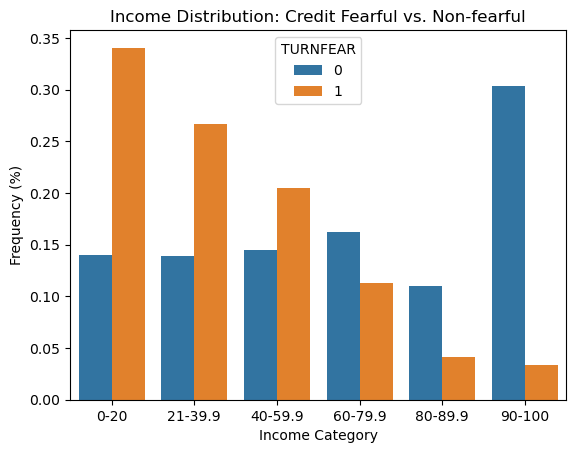

In [12]:
# Create a side-by-side bar chart of `df_inccat` using seaborn
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data=df_inccat,
    order=inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes. 

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

### Assets

Not all the data is demographic, though. If you were working for a bank, you would probably care less about how old the people are, and more about their ability to carry more debt. If we were going to build a model for that, we'd want to establish some relationships among the variables, and making some correlation matrices is a good place to start.

First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about `"TURNFEAR"`, but what if we looked at everyone instead? To begin with, let's bring in a clear dataset and run a single correlation.

In [13]:
# Calculate the correlation coefficient for `"ASSET"` and `"HOUSES"` in the whole dataset `df`

asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.561776546509553


That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in our `TURNFEAR` subset, though? Let's run that correlation to see if there's a difference.

In [14]:
# Calculate the correlation coefficient for `"ASSET"` and `"HOUSES"` in the whole credit-fearful subset `df_fear`

asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.36495454276411543


They're different! It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our `TURNFEAR` group than it is for the population as a whole. 

Let's make correlation matrices using the rest of the data for both `df` and `df_fear` and see if the differences persist. Here, we'll look at only 5 features: `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"`, and `"EDUC"`.

In [15]:
# Make a correlation matrix using `df`
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


In [16]:
# Make a correlation matrix using `df_fear`
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


There are some pretty important differences here! The relationship between `"DEBT"` and `"HOUSES"` is positive for both datasets, but while the coefficient for `df` is fairly weak at 0.25, the same number for `df_fear` is 0.67. 

Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our `"TURNFEAR"` folks is their primary residence, which, again, is an intuitive finding. 

`"DEBT"` and `"ASSET"` share a similarly striking difference, as do `"EDUC"` and `"DEBT"` which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.

### Education

First, let's start with education levels `"EDUC"`, comparing credit fearful and non-credit fearful groups.

![](./images/educ.png)

We will create a DataFrame `df_educ` that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset. This will be similar in format to `df_inccat`, but focus on education

In [17]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539


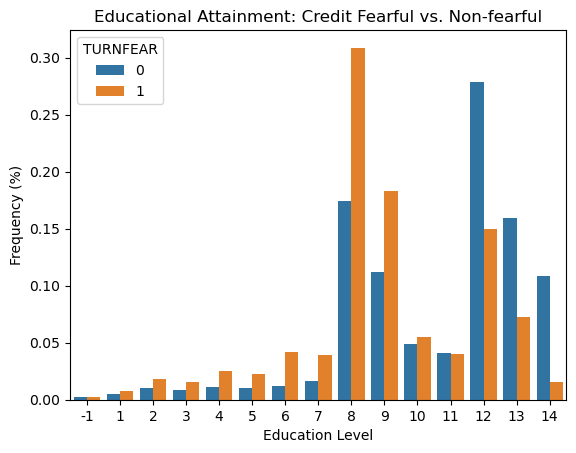

In [18]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

### Debt

Let's keep going with some scatter plots that look at debt.

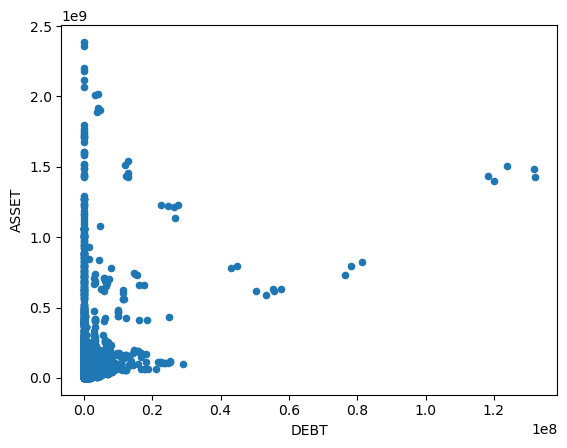

In [19]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT", y="ASSET");

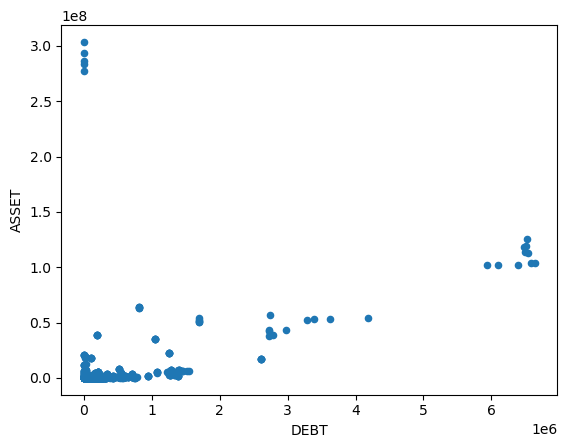

In [20]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="ASSET");

You can see relationship in our `df_fear` graph is flatter than the one in our `df` graph, but they clearly are different. 

Let's end with the most striking difference from our matrices, and make some scatter plots showing the difference between `HOUSES` and `DEBT`.

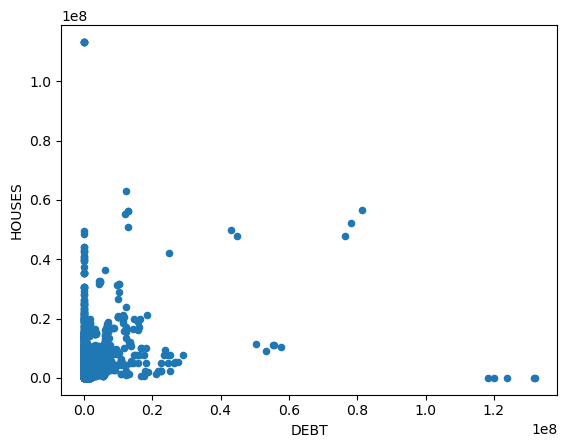

In [21]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y="HOUSES");

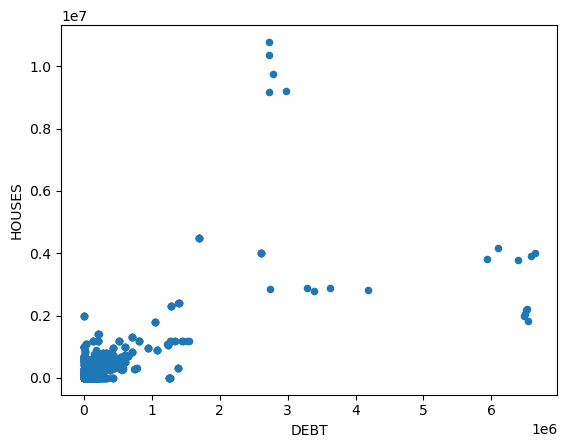

In [22]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="HOUSES");

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our `df_fear` graph shows an almost linear relationship, while our `df` graph shows something a little more muddled. You might also notice that the datapoints on the `df_fear` graph form several little groups. Those are called "clusters".